In [144]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('discount.csv')
dat.head(10)

,sku,Percent Discount
0,3,93.835341
1,4,NaN
2,5,72.754011
3,8,NaN
4,20,NaN
5,23,-89.814815
6,24,-0.383130
7,50,NaN
8,55,72.933747
9,65,43.888889


In [145]:
dat.shape

(714499, 2)

In [146]:
dat.isnull().sum()

sku                     0
Percent Discount    11644
dtype: int64

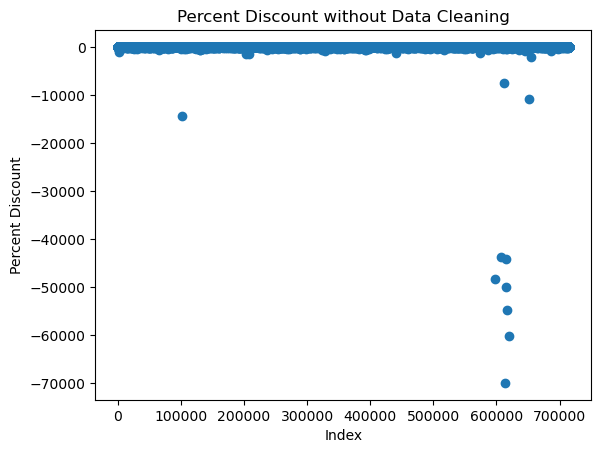

In [160]:
x = range(0, dat.shape[0])
y = dat["Percent Discount"]
plt.scatter(x,y)
plt.xlabel('Index')
plt.ylabel('Percent Discount')
plt.title('Percent Discount without Data Cleaning')
plt.show()

In [148]:
dat.isnull().sum()

sku                     0
Percent Discount    11644
dtype: int64

In [149]:
dat_no_na = dat.dropna()
print(dat_no_na.shape)
dat_no_na.head(10)

(702855, 2)


,sku,Percent Discount
0,3,93.835341
2,5,72.754011
5,23,-89.814815
6,24,-0.383130
8,55,72.933747
9,65,43.888889
10,69,-0.265306
11,73,75.000000
12,78,10.311111
13,91,24.663866


In [150]:
dat_no_na[dat_no_na["Percent Discount"] == min(y)]

,sku,Percent Discount
613744,8578442,-69900.0


After checking with the actual data, some original price is not recorded properly. For example, for sku = 8578442, the original price is 0.01, while the price that it was sold at was 7.

In [151]:
sum(dat_no_na["Percent Discount"] < 0)

1609

As seen above, there are 1609 negative values, and 11644 missing values. Seeing as there are more than 700,000 values, we can just remove them.

In [152]:
dat_clean = dat_no_na.loc[dat_no_na["Percent Discount"] >= 0]
print(sum(dat_clean["Percent Discount"] < 0))
dat_clean.shape

0


(701246, 2)

In [153]:
dat_clean

,sku,Percent Discount
0,3,93.835341
2,5,72.754011
8,55,72.933747
9,65,43.888889
11,73,75.000000
...,...,...
714494,9999967,0.000000
714495,9999970,76.253333
714496,9999974,42.863092
714497,9999992,0.000000


C:\Users\henry\AppData\Local\Temp\ipykernel_29492\1969381792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean["bin"] = pd.cut(dat_clean["Percent Discount"], 9).astype(str)


Text(0, 0.5, 'Frequency')

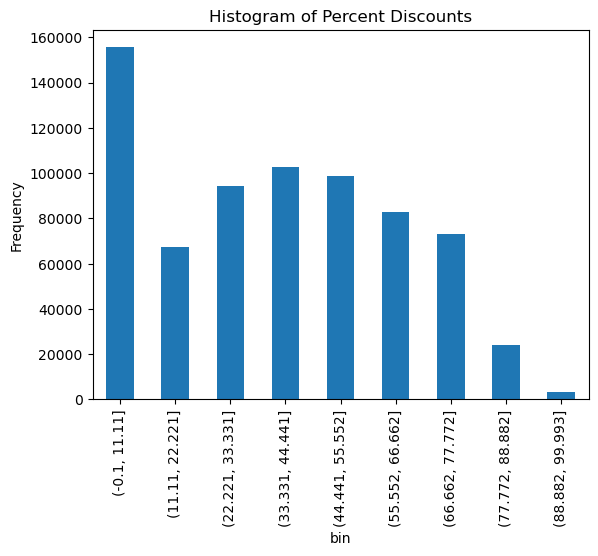

In [155]:
dat_clean["bin"] = pd.cut(dat_clean["Percent Discount"], 9).astype(str)
dat2 = dat_clean['Percent Discount'].groupby(dat_clean['bin']).count()
p = dat2.plot(kind = 'bar', title='Histogram of Percent Discounts')
p.set_ylabel("Frequency")

<AxesSubplot:>

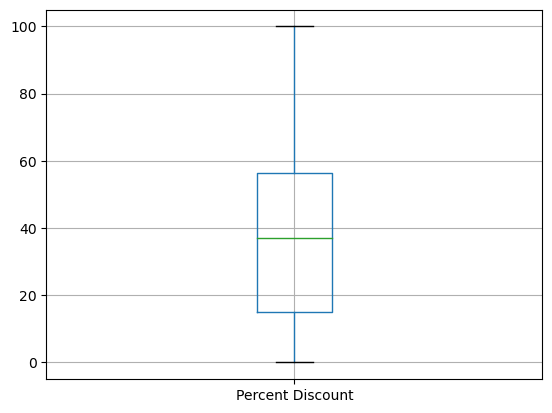

In [159]:
dat_clean.boxplot(column="Percent Discount")

In [123]:
#dat_clean.to_csv('discount_clean.csv', index = False)